In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [15]:
col = [ 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
for i in col:
    print(data[i].value_counts())

0    170
1    129
Name: anaemia, dtype: int64
0    174
1    125
Name: diabetes, dtype: int64
0    194
1    105
Name: high_blood_pressure, dtype: int64
1    194
0    105
Name: sex, dtype: int64
0    203
1     96
Name: smoking, dtype: int64
0    203
1     96
Name: DEATH_EVENT, dtype: int64


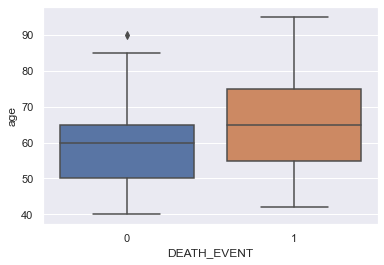

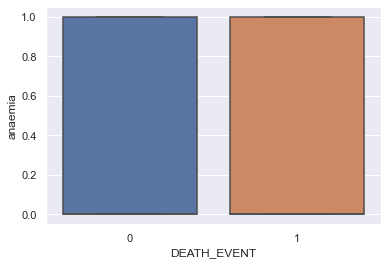

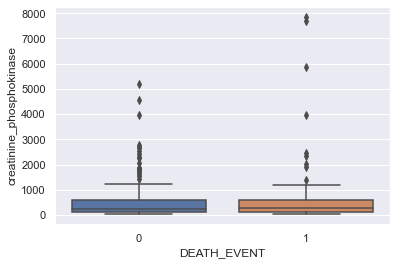

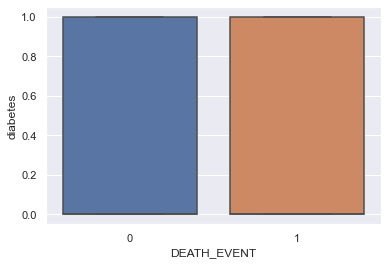

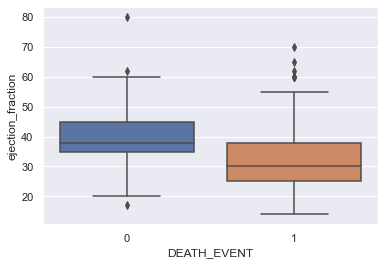

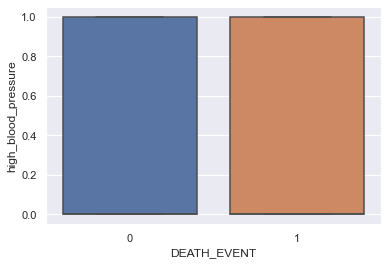

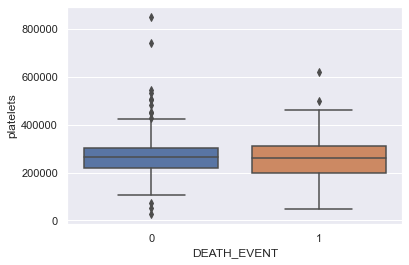

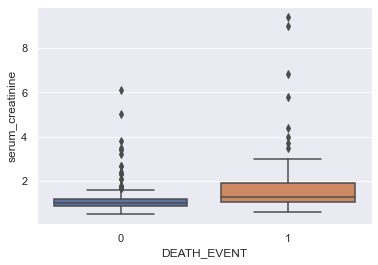

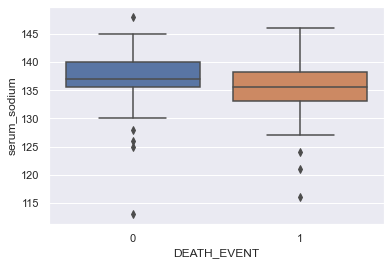

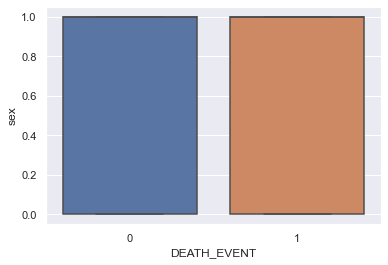

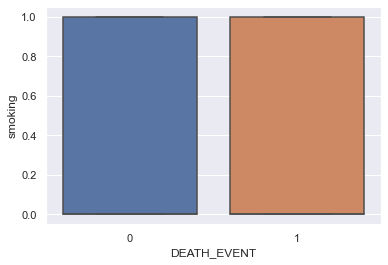

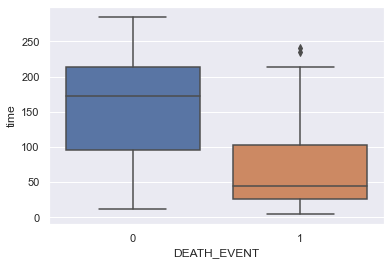

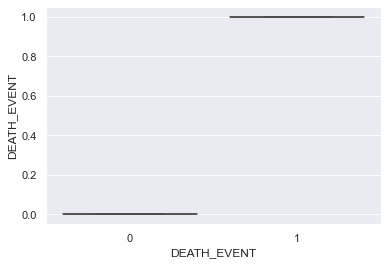

In [34]:
for i in data.columns :
    sns.boxplot(x=data['DEATH_EVENT'], y= data[i])
    plt.show()

<AxesSubplot:ylabel='Density'>

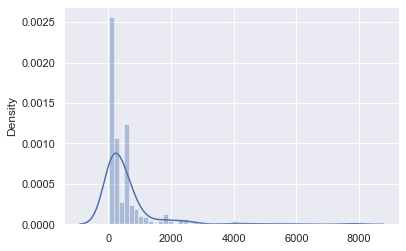

In [21]:
sns.distplot(x=data['creatinine_phosphokinase'])

<AxesSubplot:>

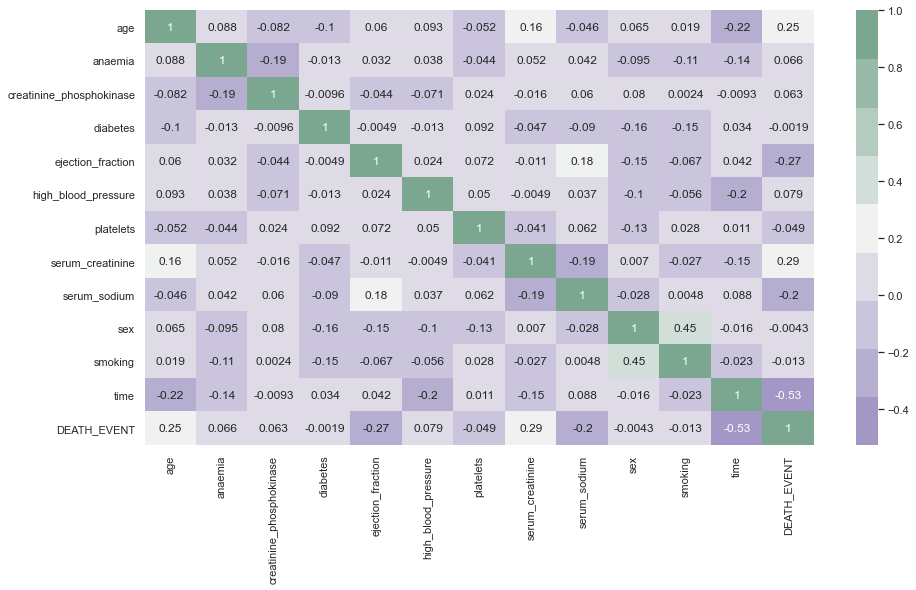

In [31]:
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap=cmap,annot=True)

In [80]:
X = data.drop('DEATH_EVENT', axis = 1)
y = data['DEATH_EVENT']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [83]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        57
           1       0.87      0.72      0.79        18

    accuracy                           0.91        75
   macro avg       0.89      0.84      0.86        75
weighted avg       0.90      0.91      0.90        75



In [84]:
print(confusion_matrix(y_test,pred))

[[55  2]
 [ 5 13]]


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

lgr = LogisticRegression()
lgr.fit(X_train, y_train)
pred_lgr = lgr.predict(X_test)

In [87]:
print(classification_report(y_test,pred_lgr))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        57
           1       0.63      0.67      0.65        18

    accuracy                           0.83        75
   macro avg       0.76      0.77      0.77        75
weighted avg       0.83      0.83      0.83        75



In [88]:
print(confusion_matrix(y_test,pred_lgr))

[[50  7]
 [ 6 12]]
